In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="white",color_codes=True)
plt.rcParams['figure.figsize'] = (15,9.27)
# Set the font set of the latex code to computer modern
matplotlib.rcParams['mathtext.fontset'] = "cm"

In [4]:
df = pd.read_csv('data/titanic/train.csv')

titanic = df.drop('Name',axis=1)

titanic.drop(['Ticket','Cabin','Embarked','PassengerId'],axis=1,inplace=True)

def encode(x):
    if x == 'male':
        return 1
    else:
        return 0

titanic['ismale'] = titanic.Sex.apply(encode)
titanic.drop('Sex',axis=1,inplace=True)
titanic.dropna(inplace=True)

titanic.head()

In [37]:
def feature_importance_plot(df,target):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    y = df[target]
    x = df.drop(target,axis=1)
    model.fit(x,y)
    res_df = pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
    res = res_df.sort_values('importance',ascending=False)
    res['cum_importance'] = res.importance.cumsum()
    plt.subplot(211)
    sns.barplot(res.feature,res.importance)
    plt.subplot(212)
    plt.plot(np.arange(1,res.shape[0]+1),res.cum_importance,linewidth=2)
    return(res)

,feature,importance,cum_importance
1,Age,0.289951,0.289951
4,Fare,0.273387,0.563339
5,ismale,0.258079,0.821417
0,Pclass,0.100295,0.921712
2,SibSp,0.048658,0.970370
3,Parch,0.029630,1.000000


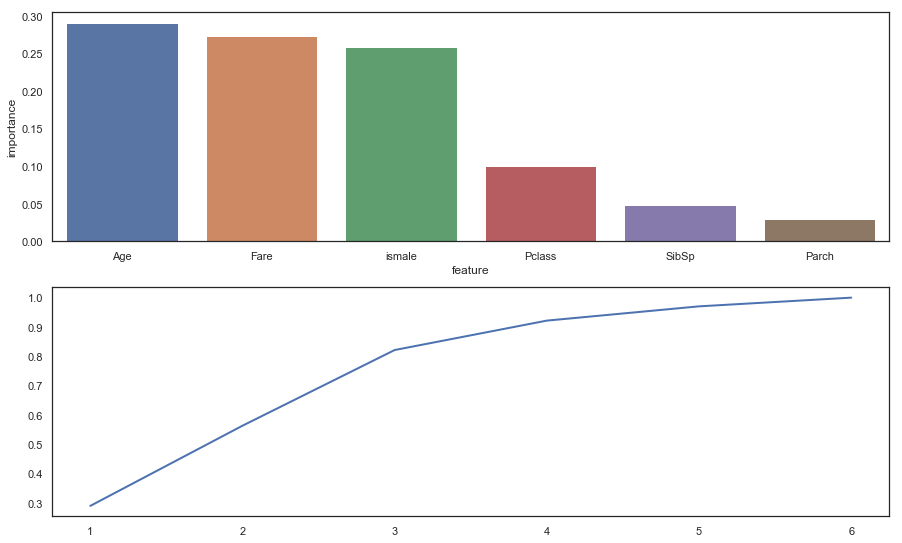

In [38]:
feature_importance_plot(titanic,'Survived')

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df['ismale'] = df.Sex.apply(lambda x: 1 if x=='male' else 0)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ismale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [51]:
df['cat'] = pd.qcut(df.Fare,3)

In [55]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
df['embarked'] = df.Embarked.map({'S':1,'C':2,'Q':3})

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ismale,cat,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 8.662]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(26.0, 512.329]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(-0.001, 8.662]",1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(26.0, 512.329]",1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(-0.001, 8.662]",1.0
